In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
len(X_train[0][0] )

32

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[0][0]

6

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

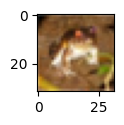

In [9]:
plot_sample(0)

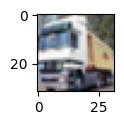

In [10]:
plot_sample(1)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[y_train[1][0]]

'truck'

In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [15]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
y_test_catagorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10 , activation="sigmoid")
])


model.compile(optimizer="SGD",
            loss="categorical_crossentropy",
            metrics=["accuracy"])
model.fit(X_train_scaled, y_train_categorical, epochs=50)

C:\Users\dastu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.3033 - loss: 1.9255
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4196 - loss: 1.6441
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4544 - loss: 1.5458
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 58ms/step - accuracy: 0.4737 - loss: 1.4902
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4919 - loss: 1.4442
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.5140 - loss: 1.3918
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5279 - loss: 1.3462
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.5359 - loss: 1.3151
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.5505 - loss: 1.2850
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5662 - loss: 1.2460
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5790 - loss: 1.2217
Epoch 1

In [ ]:
# when we have catagorical variable ouyput like y_train we use sparse_categorical_crossentropy
# when we have one hot encoded var like y_train_categorical we use categorical_crossentropy

In [18]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


'cat'

In [20]:
classes[y_test[0][0]]

'cat'